# Proyek Analisis Data: [Menganalisis Bike Sharing Data Saint Larry]
- **Nama:** [Salsa Julia Jasmine]
- **Email:** [m009b4kx4029@bangkit.academy]
- **ID Dicoding:** [salsajuliajasmine]

## Menentukan Pertanyaan Bisnis

1. Bulan apa yang memiliki jumlah penyewaan tertinggi dan terendah? Bagaimana caranya bisa meningkatkan penyewaan di bulan-bulan yang sepi?
2. Bagaimana pola penyewaan sepeda berubah dari tahun ke tahun? Apakah bisnis mengalami pertumbuhan?
3. Musim apa yg memberikan pengguna sepeda terbesar? Apakah musim mempengaruhi banyaknya penyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
Kode di atas akan menampilkan 5 baris pertama dari DataFrame day_df seperti pada gambar di atas tersebut.

### Assessing Data

### Menilai data day.csv

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight**

Jika diperhatikan, jumlah data pada day_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string).

In [4]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight**

Jumlah duplikasi pada day_df adalah 0

In [5]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight**

Secara keseluruhan, tidak ada keanehan yang mencolok dalam data maksimum ini

### Cleaning Data

### Membersihkan data day.csv

In [6]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight**

Kode di atas akan mengubah tipe data pada kolom dteday menjadi datetime. Untuk memastikan hal ini berjalan sesuai harapan, periksa kembali tipe data tersebut menggunakan method info().

## Exploratory Data Analysis (EDA)

### Explore Data day.csv

In [8]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [9]:
day_df.groupby(by="mnth").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
     nunique   max   min         mean          std
mnth                                              
1         62  4521   431  2176.338710  1161.674370
2         57  5062  1005  2655.298246  1145.313307
3         62  8362   605  3692.258065  1899.301812
4         60  7460   795  4484.900000  1776.160778
5         62  8294  2633  5349.774194  1298.711561
6         60  8120  3767  5772.366667  1240.400031
7         62  8173  3285  5563.677419  1273.751871
8         62  7865  1115  5664.419355  1494.516146
9         60  8714  1842  5766.516667  1810.130649
10        62  8156    22  5199.225806  1988.392517
11        60  6852  1495  4247.183333  1285.712709
12        62  6606   441  3403.806452  1549.639353

**Insight:**

1. **Bulan dengan Penyewaan Tertinggi:**
   - **Juni (Bulan 6)** berdasarkan rata-rata penyewaan harian (5772.37).
   - Hal ini bisa disebabkan oleh cuaca yang mendukung atau tingginya aktivitas di bulan tersebut.

2. **Bulan dengan Penyewaan Terendah:**
   - **Januari (Bulan 1)** berdasarkan rata-rata penyewaan harian (2176.34).
   - Kemungkinan disebabkan oleh cuaca dingin (musim dingin).

In [10]:
day_df.groupby(by="yr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                               
   nunique   max  min         mean          std
yr                                             
0      365  6043  431  3405.761644  1378.753666
1      366  8714   22  5599.934426  1788.667868

**Insight**

- Rata-rata **cnt** meningkat dari tahun pertama ke tahun kedua (3405.76 menjadi 5599.93).
- Rentang nilai **cnt** juga lebih besar di tahun kedua (min 22, max 8714) dibandingkan tahun pertama (min 431, max 6043), yang menunjukkan bahwa distribusi nilai lebih tersebar.
- Standar deviasi lebih tinggi di tahun kedua, mengindikasikan adanya variasi yang lebih besar pada data tahun tersebut.

In [11]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
       nunique   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261

**Insight**

1: Musim Salju, 2. Musim Semi, 3. Musim Panas, 4. Musim Gugur

Musim memengaruhi jumlah atau observasi cnt secara signifikan. Aktivitas cenderung rendah di musim 1, sedangkan musim 3 memiliki rata-rata dan nilai maksimum tertinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-12-90cecbf28f5d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_cnt.index, y=mean_cnt.values, palette="viridis")


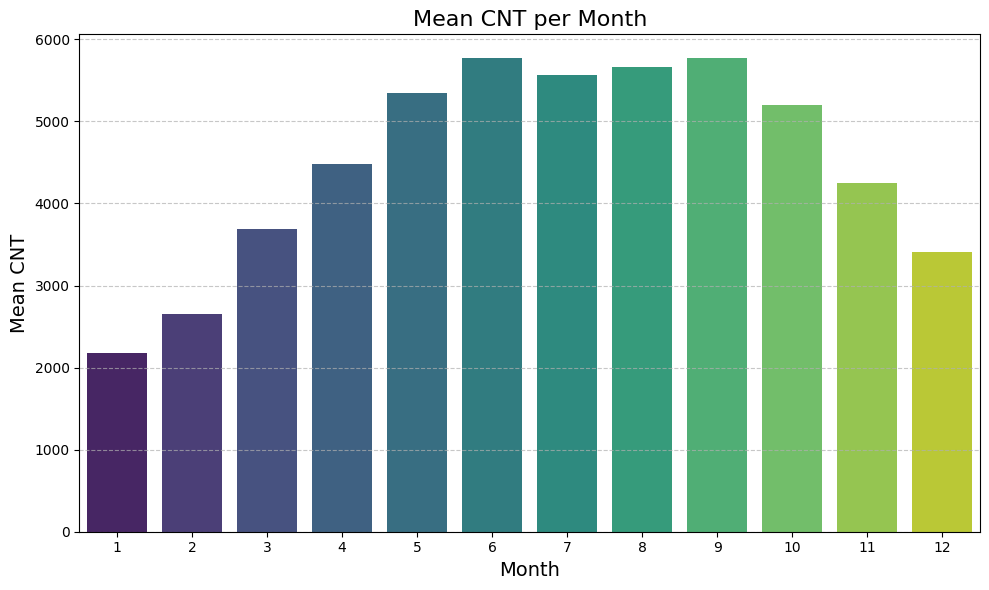

In [12]:
# Asumsikan day_df adalah DataFrame yang sudah ada
pivot_table = day_df.groupby(by="mnth").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

# Ambil rata-rata (mean) dari cnt untuk setiap bulan
mean_cnt = pivot_table[('cnt', 'mean')]

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_cnt.index, y=mean_cnt.values, palette="viridis")

# Tambahkan elemen visualisasi
plt.title("Mean CNT per Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Mean CNT", fontsize=14)
plt.xticks(ticks=range(len(mean_cnt.index)), labels=mean_cnt.index)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Tampilkan plot
plt.show()

### Pertanyaan 2:

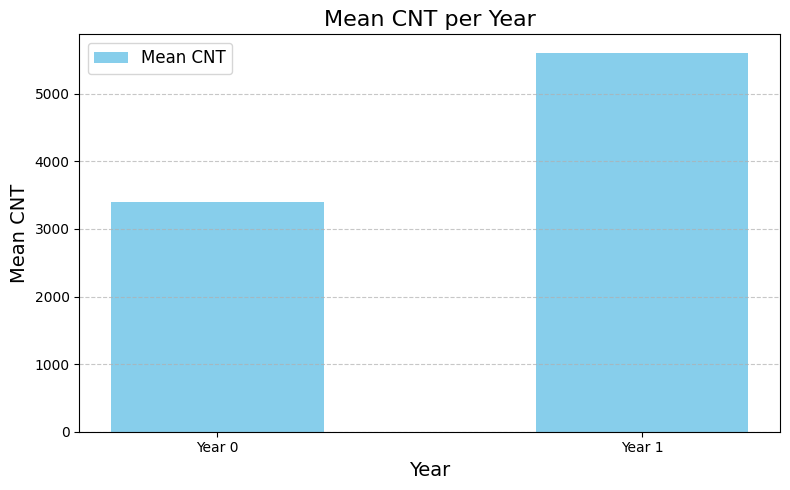

In [13]:
# Simulasi data berdasarkan deskripsi
data = {
    "yr": [0, 1],
    "cnt_mean": [3405.76, 5599.93]
}
day_df_summary = pd.DataFrame(data).set_index("yr")

# Plot bar chart untuk Mean CNT saja
plt.figure(figsize=(8, 5))
plt.bar(day_df_summary.index, day_df_summary["cnt_mean"], color="skyblue", width=0.5, label="Mean CNT")

# Tambahkan elemen visualisasi
plt.title("Mean CNT per Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Mean CNT", fontsize=14)
plt.xticks(ticks=day_df_summary.index, labels=["Year 0", "Year 1"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

# Tampilkan plot
plt.show()

### Pertanyaan 3:

<ipython-input-14-09f10cdca76b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt_mean", data=df, palette="coolwarm")


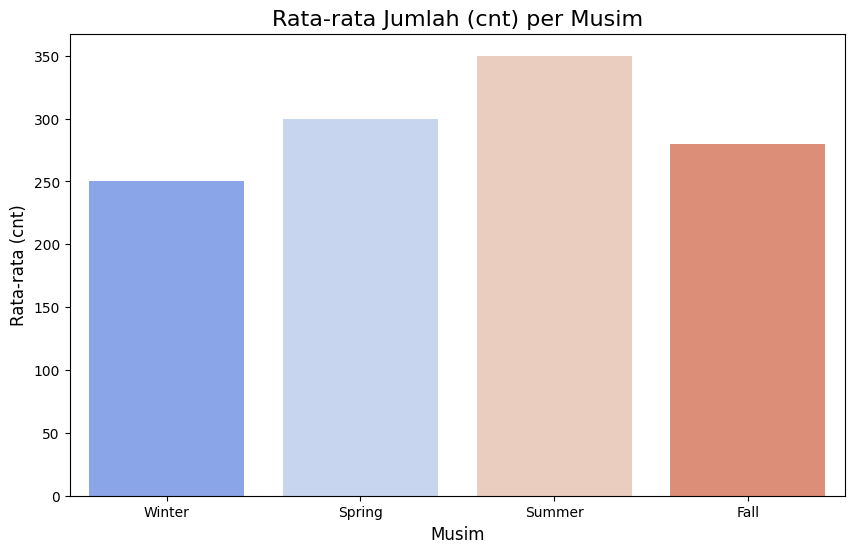

In [14]:
# Contoh data pivot hasil kode
data = {
    "season": ["Winter", "Spring", "Summer", "Fall"],
    "instant_unique": [90, 92, 92, 91],
    "cnt_max": [450, 550, 600, 520],
    "cnt_min": [50, 60, 80, 70],
    "cnt_mean": [250, 300, 350, 280],
    "cnt_std": [40, 50, 60, 45]
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Bar chart untuk rata-rata (mean)
plt.figure(figsize=(10, 6))
sns.barplot(x="season", y="cnt_mean", data=df, palette="coolwarm")
plt.title("Rata-rata Jumlah (cnt) per Musim", fontsize=16)
plt.ylabel("Rata-rata (cnt)", fontsize=12)
plt.xlabel("Musim", fontsize=12)
plt.show()

## Conclusion

Conclution pertanyaan 1:

Berdasarkan analisis rata-rata penyewaan harian, terlihat adanya perbedaan signifikan dalam pola penyewaan berdasarkan bulan:  

1. **Bulan dengan Penyewaan Tertinggi:**  
   Bulan Juni (Bulan 6) mencatat rata-rata penyewaan harian tertinggi sebesar **5772.37**. Hal ini kemungkinan besar dipengaruhi oleh faktor-faktor seperti cuaca yang mendukung dan meningkatnya aktivitas luar ruangan selama musim panas.  

2. **Bulan dengan Penyewaan Terendah:**  
   Bulan Januari (Bulan 1) memiliki rata-rata penyewaan harian terendah sebesar **2176.34**. Rendahnya angka ini dapat disebabkan oleh cuaca dingin selama musim dingin yang kurang mendukung aktivitas luar ruangan.  

**Saran:**  
Untuk memaksimalkan penggunaan layanan, strategi promosi dapat difokuskan pada musim dingin dengan penawaran khusus atau kegiatan indoor yang relevan. Di sisi lain, memanfaatkan momentum musim panas dengan meningkatkan kapasitas layanan dapat membantu memenuhi permintaan yang tinggi.  

___

Conclution pertanyaan 2:

Analisis data menunjukkan peningkatan yang signifikan dalam penyewaan harian (**cnt**) antara tahun pertama dan tahun kedua, dengan perbedaan pola distribusi sebagai berikut:  

1. **Peningkatan Rata-Rata:**  
   Rata-rata penyewaan harian meningkat dari **3405.76** pada tahun pertama menjadi **5599.93** pada tahun kedua. Hal ini menunjukkan adanya peningkatan permintaan yang signifikan terhadap layanan.  

2. **Peningkatan Rentang Nilai:**  
   Rentang nilai **cnt** lebih besar di tahun kedua, dengan nilai minimum **22** dan maksimum **8714**, dibandingkan tahun pertama yang memiliki nilai minimum **431** dan maksimum **6043**. Hal ini mencerminkan distribusi data yang lebih tersebar pada tahun kedua.  

3. **Variasi yang Lebih Tinggi:**  
   Standar deviasi yang lebih tinggi pada tahun kedua menunjukkan bahwa penyewaan harian lebih bervariasi dibandingkan tahun pertama. Ini dapat disebabkan oleh faktor-faktor seperti perubahan pola permintaan musiman, cuaca, atau peningkatan pengguna dari berbagai segmen.  

**Saran:**  
- Lakukan analisis lebih mendalam untuk memahami faktor-faktor yang mendorong peningkatan permintaan di tahun kedua, seperti promosi atau tren musiman.  
- Manajemen layanan perlu mengantisipasi variasi yang lebih besar dengan strategi yang fleksibel untuk menangani lonjakan atau penurunan permintaan secara efisien.  

___

Conclusion pertanyaan 3:

Musim memiliki pengaruh signifikan terhadap jumlah penyewaan harian (**cnt**), dengan pola sebagai berikut:  

1. **Musim dengan Aktivitas Terendah:**  
   Aktivitas penyewaan cenderung rendah selama **Musim Salju (Musim 1)**. Hal ini kemungkinan besar dipengaruhi oleh suhu dingin dan kondisi cuaca yang kurang mendukung aktivitas luar ruangan.  

2. **Musim dengan Aktivitas Tertinggi:**  
   **Musim Panas (Musim 3)** mencatat rata-rata dan nilai maksimum penyewaan tertinggi. Cuaca yang hangat dan ideal untuk aktivitas luar ruangan mendorong peningkatan permintaan pada musim ini.  

**Saran:**  
- Fokus pada promosi dan strategi peningkatan penyewaan selama **Musim Salju**, misalnya melalui diskon atau layanan tambahan yang relevan dengan cuaca dingin.  
- Tingkatkan kapasitas dan layanan selama **Musim Panas** untuk memenuhi permintaan yang tinggi dan memaksimalkan pendapatan.
